The goal of this HW is simple. Duplicate homework 8 problem 2 using neural networks. Contrast regression versus using i.) a neural network with 2 hidden nodes and ii.) 4 hidden nodes over 2 layers with 2 hidden nodes in each layer. All layers should be full connectected, MSE the loss function, a linear output activation layer and RELUs otherwise.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import csv
dat = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dat.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22,5/15/22,5/16/22,5/17/22,5/18/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179010,179017,179131,179169,179203,179242,179267,179321,179328,179477
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275372,275416,275440,275485,275534,275574,275615,275621,275688,275732
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265800,265804,265806,265808,265814,265816,265818,265823,265828,265834
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41717,41717,41717,42156,42156,42156,42156,42156,42156,42572
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


 Let A and B be your two countries. Create a plot of time versus prediction error for the following:
 
 a. fit the model on (all of) A and apply it to (all of) A, 
 b.  on the first half of the time for A, apply it to all of A.


In [2]:
## Get Italy, drop everyrthing except dates, convert to long (unstack converts to tuple)
y=dat[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()

## convert from tuple to array
y = np.asarray(y)  
## get case counts instead of cumulative counts
y = y[1 : y.size] - y[0 : (y.size - 1)]
## get the first non zero entry
y =  y[np.min(np.where(y !=  0)) : y.size]


y1= y[np.min(np.where(y !=  0))+5 : y.size]
x1=y[np.min(np.where(y !=  0))+4 : y.size-1]
x2=y[np.min(np.where(y !=  0))+3 : y.size-2]
x3=y[np.min(np.where(y !=  0))+2 : y.size-3]
x4=y[np.min(np.where(y !=  0))+1 : y.size-4]
x5=y[np.min(np.where(y !=  0)) : y.size-5]

data = {"Y": y1, "X1": x1, "X2": x2, "X3": x3,"X4": x4,"X5": x5}

In [3]:
df = pd.DataFrame(data)
df

,Y,X1,X2,X3,X4,X5
0,0,0,0,0,0,2
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
829,36334,39029,39483,42683,56199,17421
830,27726,36334,39029,39483,42683,56199
831,13776,27726,36334,39029,39483,42683
832,44901,13776,27726,36334,39029,39483


In [4]:
#question 2 homework 8;

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

Part A. 
i.) a neural network with 2 hidden nodes 
All layers should be full connectected, MSE the loss function, a linear output activation layer and RELUs otherwise.

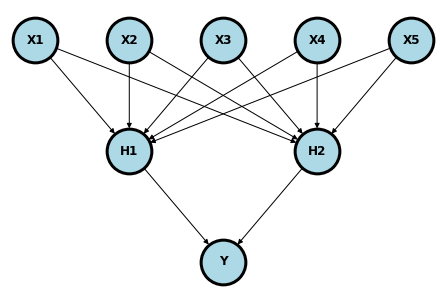

In [5]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("X1",  pos = (0, 2) )
G.add_node("X2",  pos = (1, 2) )
G.add_node("X3",  pos = (2, 2) )
G.add_node("X4",  pos = (3, 2) )
G.add_node("X5",  pos = (4, 2) )

G.add_node("H1",  pos = (1, 1) )
G.add_node("H2",  pos = (3, 1) )

G.add_node("Y" ,  pos = (2, 0) )

G.add_edges_from([ ("X1", "H1"), ("X2", "H1"), ("X3", "H1"),  ("X4", "H1"), ("X5", "H1")])
G.add_edges_from([ ("X1", "H2"), ("X2", "H2"), ("X3", "H2"),  ("X4", "H2"), ("X5", "H2")])

G.add_edges_from([ ("H1",  "Y"), ("H2",  "Y")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 2000,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.3, 4.3])
ax.set_ylim([-.3, 2.3])
plt.show()

All layers should be full connectected, MSE the loss function, a linear output activation layer and RELUs otherwise.

In [109]:
 #a. fit the model on (all of) A and apply it to (all of) A,
 #b. fit A on the first half of the time for A, apply it to all of A.

In [8]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
sns.set()
 ###a. fit the model on (all of) A and apply it to (all of) A,
#trainFraction1 = 1
#sample1 = np.random.uniform(size = y1.size) < trainFraction1
#trainingDat1 = df[sample1]

trainFraction = .5

               
sample = np.random.uniform(size = y1.size) < trainFraction
trainingDat = df[sample]
testingDat = df


In [9]:
df.head()

,Y,X1,X2,X3,X4,X5
0,0,0,0,0,0,2
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [10]:
x = torch.from_numpy(df[['X1','X2', 'X3', 'X4', 'X5', ]].values)
y = torch.from_numpy(df[['Y']].values)

##pytorch wants type as float
x = x.float()
y = y.float()

xtraining = x[sample]
xtesting = x
ytraining = y[sample]
ytesting = y



[
 xtraining.size(),
 ytraining.size(),
 xtesting.size(),
 ytesting.size(),
]



[torch.Size([414, 5]),
 torch.Size([414, 1]),
 torch.Size([834, 5]),
 torch.Size([834, 1])]

In [11]:
## Define the model
## Dimension of the hidden layer
H = 2

## Number of predictors
D_in = xtraining.size()[1]
D_out = 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [12]:
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(100000):
    y_pred = model(xtraining)
    loss = loss_fn(y_pred, ytraining)
    if t % 10000 == 0:
        print(t, loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 1317947179008.0
10000 507247034368.0
20000 507247034368.0
30000 507247034368.0
40000 507247034368.0
50000 507247034368.0
60000 507247034368.0
70000 507247034368.0
80000 507247034368.0
90000 507247034368.0


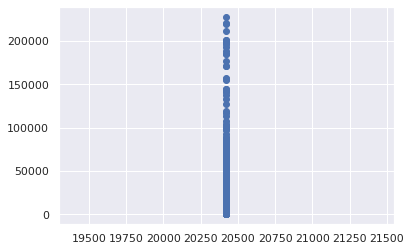

In [13]:
## try prediction
ytesting_pred = model(xtesting)
a = ytesting_pred.detach().numpy()

plt.scatter(a[:,0], ytesting[:,0])

Part B

ii.) 4 hidden nodes over 2 layers with 2 hidden nodes in each layer.

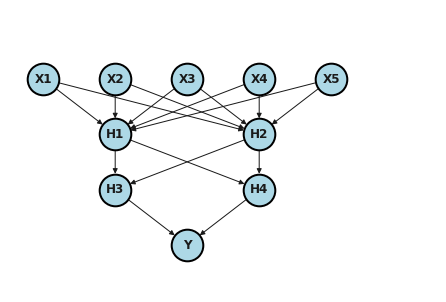

In [15]:
#plt.figure(figsize=[2, 2])
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("X1",     pos = (0, 3) )
G.add_node("X2",     pos = (1, 3) )
G.add_node("X3",     pos = (2, 3) )
G.add_node("X4",     pos = (3, 3) )
G.add_node("X5",     pos = (4, 3) )

G.add_node("H1",  pos = (1.0, 2) )
G.add_node("H2",  pos = (3.0, 2) )

G.add_node("H3",  pos = (1.0, 1) )
G.add_node("H4",  pos = (3.0, 1) )

G.add_node("Y" ,  pos = (2, 0) )

G.add_edges_from([ ("X1", "H1"), ("X2", "H1"), ("X3", "H1"),  ("X4", "H1"), ("X5", "H1")])
G.add_edges_from([ ("X1", "H2"), ("X2", "H2"), ("X3", "H2"),  ("X4", "H2"), ("X5", "H2")])
G.add_edges_from([ ("H1", "H3"), ("H2", "H3")])
G.add_edges_from([ ("H1", "H4"), ("H2", "H4")])

G.add_edges_from([ ("H3",  "Y"), ("H4",  "Y")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 1000,
        node_color = "lightblue",
        linewidths = 2)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.5, 5.5])
ax.set_ylim([-.9, 4.3])
plt.show()

In [18]:
## Define the model
## Dimension of the hidden layer
H1 = 2
H2= 2
## Number of predictors
D_in = xtraining.size()[1]
D_out = 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, D_out),
)

In [19]:
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(100000):
    y_pred = model(xtraining)
    loss = loss_fn(y_pred, ytraining)
    if t % 10000 == 0:
        print(t, loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 679839858688.0
10000 507247034368.0
20000 507247034368.0
30000 507247034368.0
40000 507247034368.0
50000 507247034368.0
60000 507247034368.0
70000 507247034368.0
80000 507247034368.0
90000 507247034368.0


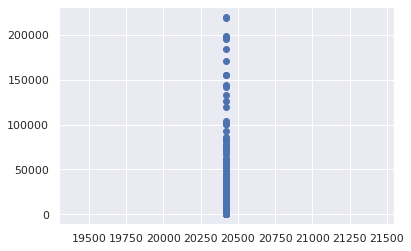

In [20]:
## try prediction
ytraing_pred = model(xtraining)
b =ytraing_pred.detach().numpy()

plt.scatter(b[:,0], ytraining[:,0])